Mounted at /content/drive
✅ Found file at: /content/drive/My Drive/Smart Complaint Prioritizer/data/processed/complaints_with_features.csv
Loading data... (approx 30 seconds)

Generating High Priority Word Cloud...


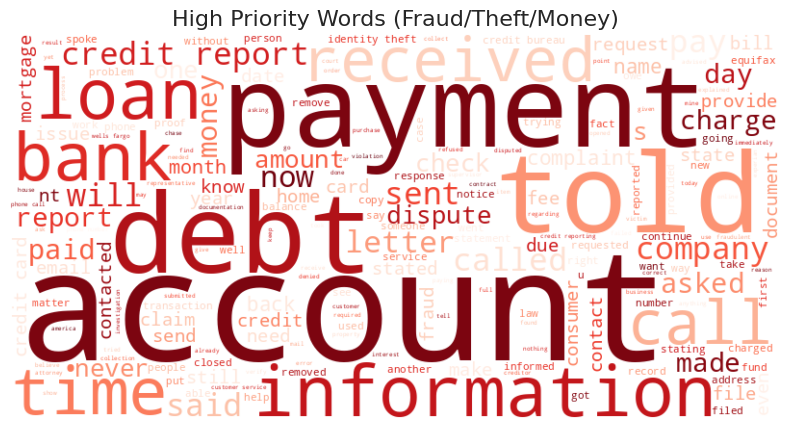


✅ Success! Image saved to: /content/drive/My Drive/Smart Complaint Prioritizer/reports/figures


In [1]:
# --- 1. CLEAN MOUNT ---
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# This will pop up the permission box again. Click "Allow".
drive.mount('/content/drive')

# --- 2. CONFIGURATION ---
PROJECT_PATH = "/content/drive/My Drive/Smart Complaint Prioritizer"
INPUT_FILE = f"{PROJECT_PATH}/data/processed/complaints_with_features.csv"
FIGURES_PATH = f"{PROJECT_PATH}/reports/figures"

# --- 3. CHECK & LOAD ---
if os.path.exists(INPUT_FILE):
    print(f"✅ Found file at: {INPUT_FILE}")
    print("Loading data... (approx 30 seconds)")
    df = pd.read_csv(INPUT_FILE)

    # --- 4. GENERATE VISUALS ---
    os.makedirs(FIGURES_PATH, exist_ok=True)
    sns.set_style("whitegrid")

    # Generate the "High Priority" Word Cloud
    print("\nGenerating High Priority Word Cloud...")
    subset = df[df['priority'] == 'High']

    # Sample 5000 rows for speed
    text = " ".join(subset['cleaned_narrative'].astype(str).sample(5000, random_state=42))

    wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("High Priority Words (Fraud/Theft/Money)", fontsize=16)

    # Save and Show
    plt.savefig(f"{FIGURES_PATH}/wordcloud_high.png")
    plt.show()

    print(f"\n✅ Success! Image saved to: {FIGURES_PATH}")

else:
    print(f"❌ Error: Could not find file at {INPUT_FILE}")
    print("Please verify your Google Drive folder structure.")